# Advance Lane Lines

In [10]:
import os
import numpy as np
import glob
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Camera calibration and distorsion correction

The following code is base in the Udacity repository:  [CarND-Camera-Calibration](https://github.com/udacity/CarND-Camera-Calibration/blob/master/camera_calibration.ipynb)

Create the image and object points to calibrate the camera. 
The object points are the same for all the images as all the calibration images are chess boards of the same dimension (6x9). 
The images points are arrays with the coordinates of the corners.

In [11]:
# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((6*9,3), np.float32)
objp[:,:2] = np.mgrid[0:9, 0:6].T.reshape(-1,2)
                                          
print("Object point (1st row):")
print(objp[0:9,:])                                          

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.

# Make a list of calibration images
images = glob.glob('camera_cal/calibration*.jpg')

print("\nImages uses for calibrate the camera: ")
# Step through the list and search for chessboard corners
for idx, fname in enumerate(images):
    
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (9,6), None)

    # If found, add object points, image points
    if ret == True:
        print(idx, " ", end="")
        objpoints.append(objp)
        imgpoints.append(corners)

print("\n\nImages points (1st row):")
print(imgpoints[-1][0:9,0])

Object point (1st row):
[[ 0.  0.  0.]
 [ 1.  0.  0.]
 [ 2.  0.  0.]
 [ 3.  0.  0.]
 [ 4.  0.  0.]
 [ 5.  0.  0.]
 [ 6.  0.  0.]
 [ 7.  0.  0.]
 [ 8.  0.  0.]]

Images uses for calibrate the camera: 
1  2  3  4  5  6  7  8  9  10  11  12  13  16  17  18  19  

Images points (1st row):
[[ 622.59265137  147.06881714]
 [ 661.09936523  162.3087616 ]
 [ 697.16424561  177.31687927]
 [ 731.43341064  191.54307556]
 [ 763.58007812  205.2311554 ]
 [ 793.96057129  218.34494019]
 [ 822.22521973  230.58702087]
 [ 849.57891846  242.73017883]
 [ 874.94610596  253.94567871]]


Display an example of how the images points are created . The coordinates of the corners in the image point are saved and they will be compared with object points to calibrate the camera. The calibration camera uses multiple images, in our case we have 19 calibration images.

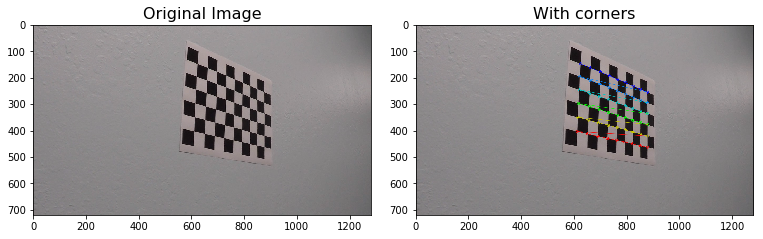

In [12]:
#Display orignal and corner images of the read image
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 10))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=16)
cv2.drawChessboardCorners(img, (9, 6), corners, ret)
ax2.imshow(img)
ax2.set_title('With corners', fontsize=16)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

Use the object points and the image points to calibrate the camera

In [13]:
#Take the last calibration image as reference image
img_size = (img.shape[1], img.shape[0])

# Do camera calibration given object points and image points
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size, None, None)

Create the pipeline function for undistort images using the calibration camera parameters

In [14]:
def undistortImg(img, mtx, dist):
    return cv2.undistort(img, mtx, dist, None, mtx)

Test the undistorsion function

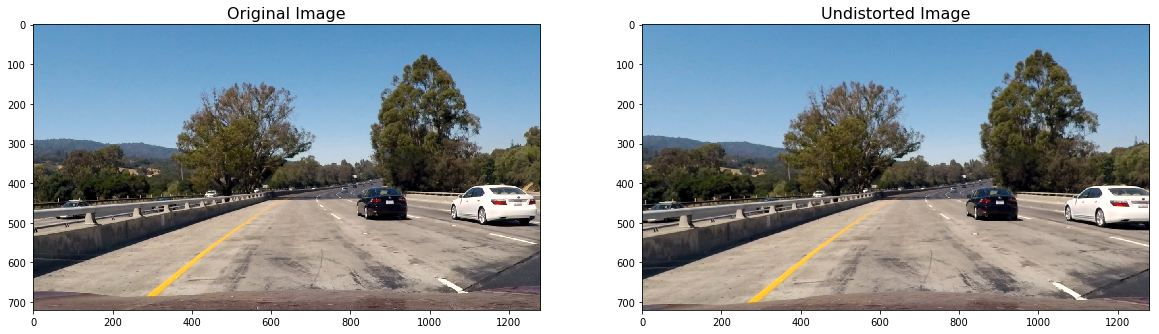

In [15]:
#Take test1.jpg image as reference image
img = cv2.imread('test_images/test1.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

#Pipeline: Get the undistorted images
dst = undistortImg(img, mtx, dist)

# Visualize undistortion
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=16)
ax2.imshow(dst)
ax2.set_title('Undistorted Image', fontsize=16)
img_size = (img.shape[1], img.shape[0])

## 2. Perpective transformation

In order to change the perpesctive of a image, the source and destination area should be defined:

In [16]:
#Take test1.jpg image as reference image
img = cv2.imread('test_images/test1.jpg')

#Get the shape from the image
imshape = np.array(img).shape
    
#Define the points of the source area
srcPointDownLeft  = [ int(imshape[1]*0.10),  int(imshape[0]*0.95) ]
srcPointUpLeft    = [ int(imshape[1]*0.40),  int(imshape[0]*0.65) ]

srcPointDownRight = [ int(imshape[1]*0.95),  int(imshape[0])*0.95]
srcPointUpRight   = [ int(imshape[1]*0.60),  int(imshape[0]*0.65) ]
    
#Define the source area 
src = np.float32([srcPointDownLeft, srcPointUpLeft, srcPointUpRight, srcPointDownRight])
       
#Define the points of the destination area
destPointDownLeft  = [ int(imshape[1]*0.10),  int(imshape[0])]
destPointUpLeft    = [ int(imshape[1]*0.00),  int(imshape[0]*0.0)]

destPointDownRight = [ int(imshape[1]*0.95),  int(imshape[0])]
destPointUpRight   = [ int(imshape[1]*1.0),  int(imshape[0]*0.0)]

#Define the dest area 
dst = np.float32([destPointDownLeft, destPointUpLeft, destPointUpRight, destPointDownRight])

Create the pipeline function for get a bird eye perspective using the source and destination area defined before

In [17]:
def birdEye(img, src, dst): 
    
    # Given src and dst points, calculate the perspective transform matrix
    M = cv2.getPerspectiveTransform(src , dst)
    
    # Given src and dst points, calculate the inverse perspective transform matrix
    Mi = cv2.getPerspectiveTransform(src , dst)
    
    # Warp the image using OpenCV warpPerspective()
    warped = cv2.warpPerspective(img, M, img_size)
    
    return warped, M, Mi

Test the birdEye function using the test images. The red polygon is the source area while the green one is the destination area.

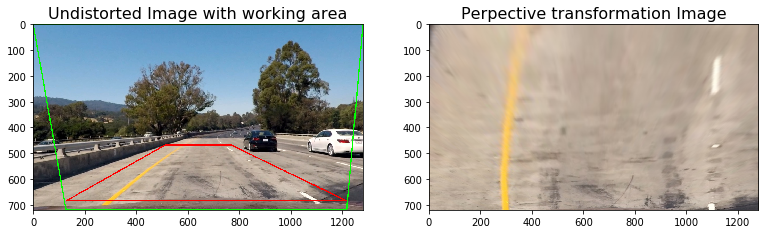

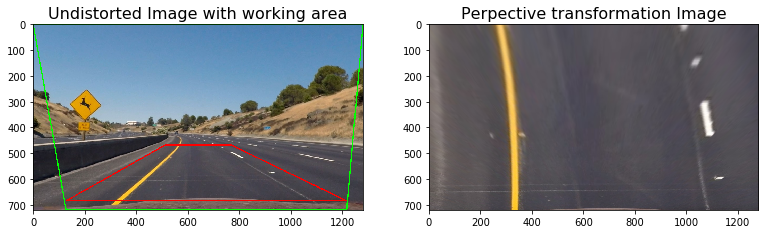

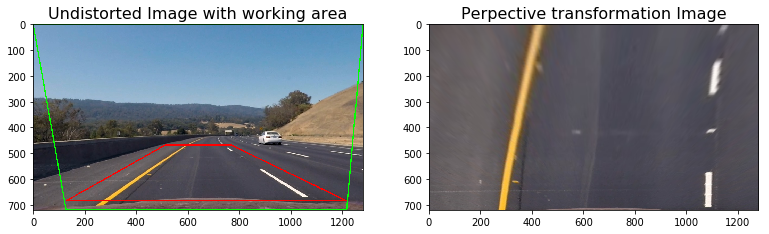

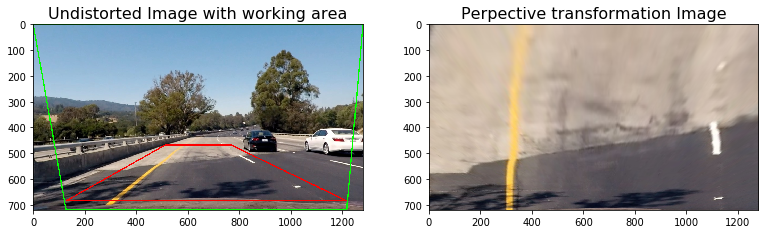

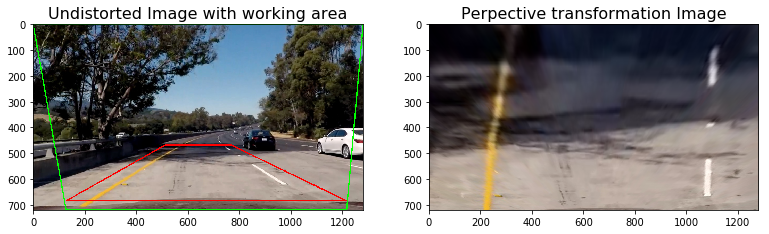

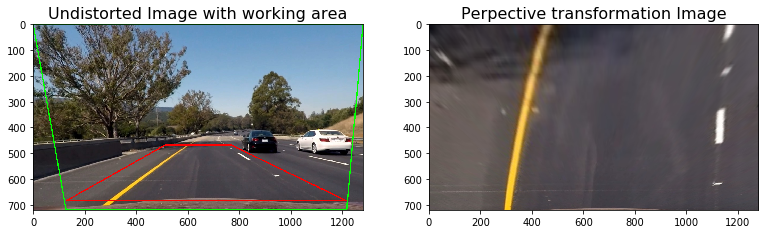

In [18]:
images = glob.glob('test_images/test*.jpg')

for idx, fname in enumerate(images):
    
    #Read image and transform to RGB
    img = cv2.imread(fname)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
    #Pipeline: Get the perspective transformation of the undistorted images
    img = undistortImg(img, mtx, dist)
    imgWarped, M, Mi = birdEye(img, src, dst)

    #Create a image with the work and destination area highlighted
    pts = src.reshape((-1,1,2))
    pts = np.array(pts, np.int32)
    cv2.polylines(img,[pts],True,(255,0,0), 3) 

    pts = dst.reshape((-1,1,2))
    pts = np.array(pts, np.int32)
    cv2.polylines(img,[pts],True,(0,255,0), 3) 

    #display origianl and transformation images
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(13,10))                                           
    ax1.imshow(img)
    ax1.set_title('Undistorted Image with working area', fontsize=16)
    ax2.imshow(imgWarped)
    ax2.set_title('Perpective transformation Image', fontsize=16)   
    

## 3. Threshold and color filtering

### 3.1 Sobel threslhold

### 3.2 Magnitude threslhold

### 3.3 Direction threslhold

### 3.4 HLS color filtering 